# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [3]:
#!python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [4]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:

    if not isinstance(m, int) or not isinstance(n, int) or n<1 or m<1:
        return None

    wek = np.linspace(0,1,num=m)
    b = np.cos(4*wek)
    A = np.vander(wek, n, increasing=True)
    b = np.reshape(b, (m,))

    return (A ,b)

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [22]:
import time
import scipy as sp


def square_from_rectan(
    A: np.ndarray, b: np.ndarray
) -> tuple[np.ndarray, np.ndarray] | None:
    
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    if b.ndim != 1:
        return None
    if A.shape[0] != b.shape[0]:
        return None
    if A.ndim != 2:
        return None

    A_new = np.matmul(A.T, A)
    b_new = np.matmul(A.T, b)
    return (A_new, b_new)

def residual_norm(A:np.ndarray,x:np.ndarray, b:np.ndarray):
    if not isinstance(A, np.ndarray) or not isinstance(x, np.ndarray) or not isinstance(b, np.ndarray):
        return None

    if A.shape[1] != x.shape[0]:
        return None
    if A.shape[0] != b.shape[0]:
        return None

    Ax = np.dot(A, x)
    
    residuum = b - Ax
    
    norma = np.linalg.norm(residuum)
    
    return norma


def metoda_solve(A, b):
    start = time.perf_counter()
    A_n, b_n = square_from_rectan(A, b)
    x = np.linalg.solve(A_n, b_n)
    end = time.perf_counter()
    print(f"[Solve]  Czas: {end - start:.6f}s, Residuum: {residual_norm(A, x, b):.3e}")
    return x


def metoda_lstsq(A, b):
    start = time.perf_counter()
    A_n, b_n = square_from_rectan(A, b)
    x, _, _, _ = np.linalg.lstsq(A_n, b_n, rcond=None)
    end = time.perf_counter()
    print(f"[Lstsq]  Czas: {end - start:.6f}s, Residuum: {residual_norm(A, x, b):.3e}")
    return x


def metoda_qr(A, b):
    start = time.perf_counter()
    Q, R = np.linalg.qr(A)
    Qt_b = np.dot(Q.T, b)
    x = sp.linalg.solve_triangular(R, Qt_b, lower=False)
    end = time.perf_counter()
    print(f"[QR]     Czas: {end - start:.6f}s, Residuum: {residual_norm(A, x, b):.3e}")
    return x


def metoda_svd(A, b):
    start = time.perf_counter()
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    S_inv = np.diag(1 / S)
    x = np.dot(Vt.T, np.dot(S_inv, np.dot(U.T, b)))
    end = time.perf_counter()
    print(f"[SVD]    Czas: {end - start:.6f}s, Residuum: {residual_norm(A, x, b):.3e}")
    return x

A, b = spare_matrix_Abt(50, 12)

print("=== Test metod rozwiązywania układów równań ===\n")

%memit x1 = metoda_solve(A, b)
%memit x2 = metoda_lstsq(A, b)
%memit x3 = metoda_qr(A, b)
%memit x4 = metoda_svd(A, b)





=== Test metod rozwiązywania układów równań ===

[Solve]  Czas: 0.000273s, Residuum: 1.762e-08
peak memory: 123.81 MiB, increment: 0.00 MiB
[Lstsq]  Czas: 0.000402s, Residuum: 3.146e-08
peak memory: 123.70 MiB, increment: 0.00 MiB
[QR]     Czas: 0.000620s, Residuum: 7.999e-09
peak memory: 123.70 MiB, increment: 0.00 MiB
[SVD]    Czas: 0.000363s, Residuum: 7.999e-09
peak memory: 123.72 MiB, increment: 0.02 MiB


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [74]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

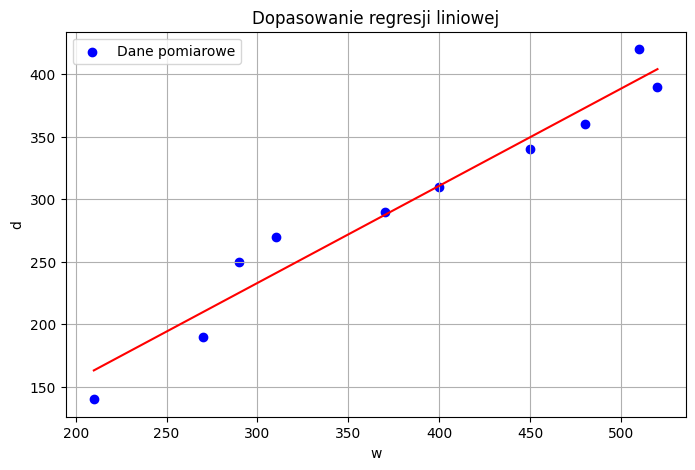

In [79]:
# ===== Twoja implementacja tutaj =====
d = d.reshape(10, 1)
w = w.reshape(10, )
A_w, b_w = square_from_rectan(d, w)
omega = np.matmul(np.linalg.inv(A_w), b_w)
b = np.mean(w) - omega * np.mean(d)

x = np.linspace(210, 520, 100)

d_pred = omega * x + b

# wykres
plt.figure(figsize=(8,5))
plt.scatter(d, w, color='blue', label='Dane pomiarowe')
plt.plot(x, d_pred, color='red')
plt.title('Dopasowanie regresji liniowej')
plt.xlabel('w')
plt.ylabel('d')
plt.legend()
plt.grid(True)
plt.show()

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.


Model 1: y = b0 + b1*x1
Z shape: (100, 2)
  b[0] = 1.898364
  b[1] = 0.826133
MSE = 0.968008, R^2 = 0.367151

Model 2: y = b0 + b1*x2
Z shape: (100, 2)
  b[0] = 1.856943
  b[1] = -0.240020
MSE = 1.476533, R^2 = 0.034696

Model 3: y = b0 + b1*x1 + b2*x2
Z shape: (100, 3)
  b[0] = 1.887517
  b[1] = 0.906487
  b[2] = -0.401904
MSE = 0.824519, R^2 = 0.460960

Model 4: y = b0 + b1*x1 + b2*x2 + b3*(x1*x2)
Z shape: (100, 4)
  b[0] = 1.896191
  b[1] = 0.902463
  b[2] = -0.408066
  b[3] = -0.054549
MSE = 0.822686, R^2 = 0.462157


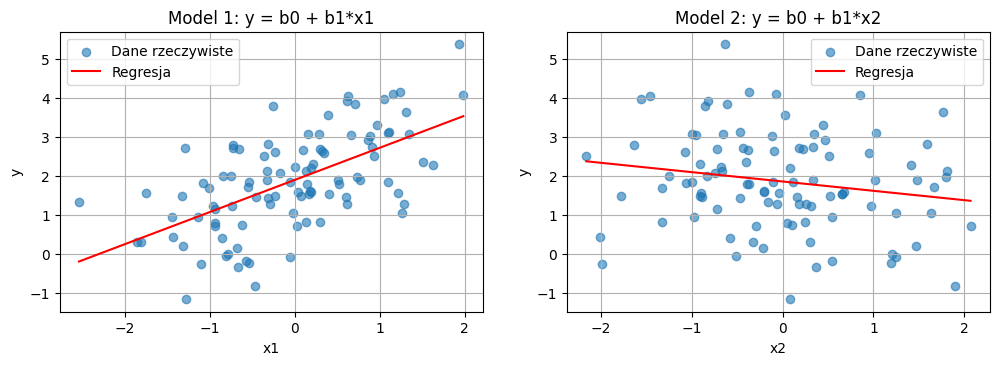

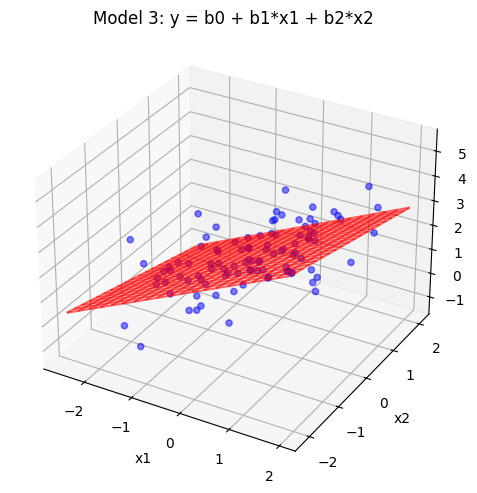


Analiza wyników:
znajlepsze dopasnowanie ma model 3 bo ma najnizszy błąd średniokwadratowy


In [93]:
# ===== Twoja implementacja tutaj =====
n = 100

x1 = np.random.normal(0, 1, (n, 1))
x2 = np.random.normal(0, 1, (n, 1))
eps = np.random.normal(0, 1, (n, 1))

y = 2 + x1 - 0.5 * x2 + eps

def qr_solve(Z, y):
    Q, R = np.linalg.qr(Z, mode='reduced')
    Qt_y = Q.T @ y
    b = sp.linalg.solve_triangular(R, Qt_y, lower=False)
    return b

def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

def r2_score(y, y_pred):
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - ss_res / ss_tot

models = {
    "Model 1": ("y = b0 + b1*x1", np.hstack([np.ones((n,1)), x1])),
    "Model 2": ("y = b0 + b1*x2", np.hstack([np.ones((n,1)), x2])),
    "Model 3": ("y = b0 + b1*x1 + b2*x2", np.hstack([np.ones((n,1)), x1, x2])),
    "Model 4": ("y = b0 + b1*x1 + b2*x2 + b3*(x1*x2)", np.hstack([np.ones((n,1)), x1, x2, x1*x2]))
}

results = {}

for name, (formula, Z) in models.items():
    b_hat = qr_solve(Z, y)
    y_hat = Z @ b_hat
    results[name] = {
        "formula": formula,
        "b_hat": b_hat.flatten(),
        "MSE": mse(y, y_hat),
        "R2": r2_score(y, y_hat),
        "Z_shape": Z.shape
    }

for name, res in results.items():
    print(f"\n{name}: {res['formula']}")
    print(f"Z shape: {res['Z_shape']}")
    for i, b in enumerate(res['b_hat']):
        print(f"  b[{i}] = {b:.6f}")
    print(f"MSE = {res['MSE']:.6f}, R^2 = {res['R2']:.6f}")


# Model 1
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(x1, y, label="Dane rzeczywiste", alpha=0.6)
plt.plot(np.sort(x1, axis=0),
         results["Model 1"]["b_hat"][0] + results["Model 1"]["b_hat"][1] * np.sort(x1, axis=0),
         color="red", label="Regresja")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Model 1: y = b0 + b1*x1")
plt.legend()
plt.grid(True)

# Model 2
plt.subplot(2, 2, 2)
plt.scatter(x2, y, label="Dane rzeczywiste", alpha=0.6)
plt.plot(np.sort(x2, axis=0),
         results["Model 2"]["b_hat"][0] + results["Model 2"]["b_hat"][1] * np.sort(x2, axis=0),
         color="red", label="Regresja")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Model 2: y = b0 + b1*x2")
plt.legend()
plt.grid(True)

# Model 3
b3 = results["Model 3"]["b_hat"]
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
x1g = np.linspace(x1.min(), x1.max(), 20)
x2g = np.linspace(x2.min(), x2.max(), 20)
X1, X2 = np.meshgrid(x1g, x2g)
Y_hat = b3[0] + b3[1]*X1 + b3[2]*X2

ax.scatter(x1, x2, y, color='blue', alpha=0.5)
ax.plot_wireframe(X1, X2, Y_hat, color='red', alpha=0.6)
ax.set_title("Model 3: y = b0 + b1*x1 + b2*x2")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.tight_layout()
plt.show()

print("\nAnaliza wyników:")
print("znajlepsze dopasnowanie ma model 3 bo ma najnizszy błąd średniokwadratowy")





---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)